                                        Experiment No-6
Objective : Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data
set for clustering using k-Means algorithm. Compare the results of these tw 
algorithms and comment on the quality of clustering. You can add Java/Python  L
library classes/API in  theprogram.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_income = pd.read_csv('income.csv')
df_income.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
import matplotlib.pyplot as plt

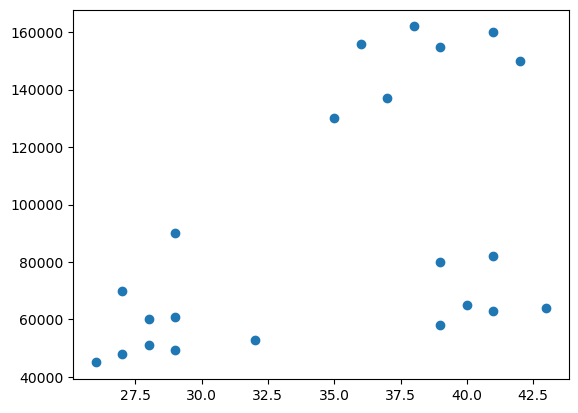

In [4]:
plt.scatter(df_income['Age'],df_income['Income($)'])

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [7]:
y_predicted_clusters = km.fit_predict(df_income[['Age','Income($)']])

In [8]:
y_predicted_clusters

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [9]:
df_income['Cluster'] = y_predicted_clusters

In [10]:
df_income.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


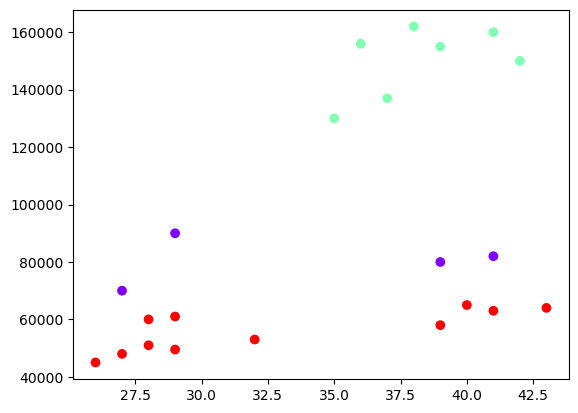

In [11]:
plt.scatter(df_income['Age'],df_income['Income($)'],c=df_income['Cluster'],cmap='rainbow')

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
df_income['Income($)'] = scaler.fit_transform(df_income[['Income($)']])
df_income['Age'] = scaler.fit_transform(df_income[['Age']])

In [15]:
df_income.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [17]:
y_predicted_clusters = km.fit_predict(df_income[['Age','Income($)']])

In [18]:
df_income['Cluster'] = y_predicted_clusters

Text(0, 0.5, 'Income in $')

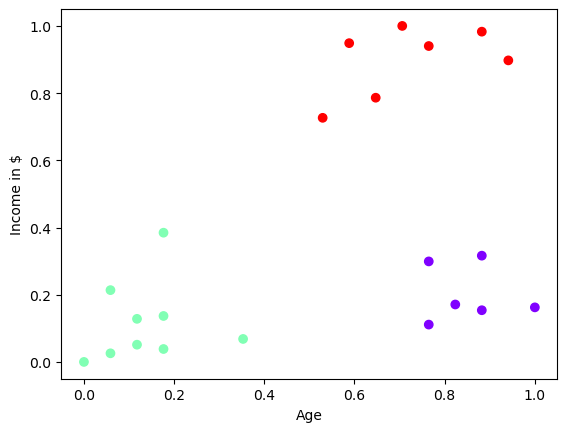

In [19]:
plt.scatter(df_income['Age'],df_income['Income($)'],c=df_income['Cluster'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income in $')

In [20]:
cluster_centers = km.cluster_centers_

Text(0, 0.5, 'Income in $')

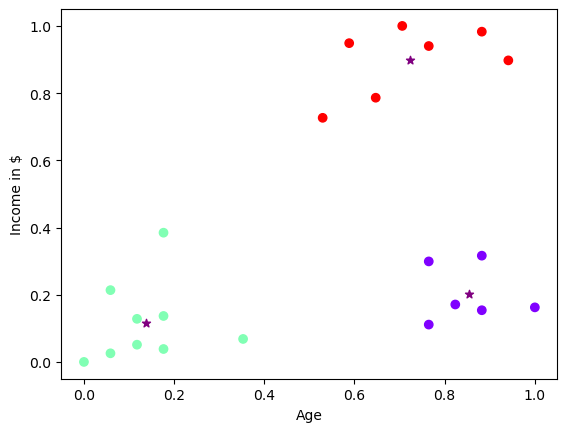

In [21]:
plt.scatter(df_income['Age'],df_income['Income($)'],c=df_income['Cluster'],cmap='rainbow')
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income in $')

In [22]:
#Elbow Method-k---->find---->sum of squared error

k_range = range(1,11)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df_income[['Age','Income($)']])
    sse.append(km.inertia_)
    

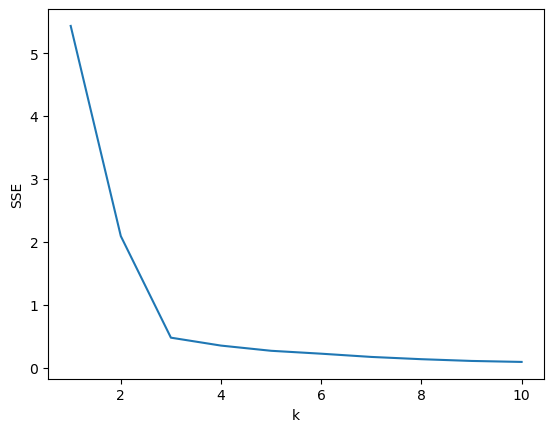

In [23]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_range,sse)